# ANOVA - Analysis of Variance


## T Test or ANOVA?
Suppose we want to compare whether multiple groups differ in some type of measures. For example, we have collected mood data grouped by four types of weather - sunny, raining, overcast, or snowy, and we want to find out whether there is a difference in mood across different weather. What tests would you use?

A natural reaction would be to conduct multiple t-tests. However, that comes with many drawbacks. First, you would need $\frac{n(n-1)}{2}$ t tests, which come out to 6 tests. Having more tests meaning having higher chance of making type I error. In this case, our original probability of making type I error grew from 5% to 5% x 6 = 30%! By conduct 6 tests and comparing their mean to each other, we are running a huge risk of making false positives. How then, can we combat this? -- ANOVA!

Instead of looking at each individual difference, ANOVA examines the ratio of variance between groups, and variance within groups, and find out whether the ratio is big enough to be statistically significant. 

#### T Test statistics 
$t = \frac{x\bar - \mu}{\frac{s}{\sqrt n}}$

#### ANOVA - the F test
$F = \frac{MS_bet}{MS_within}$

We can also say that t test is a special case of ANOVA in that we are comparing the means of only two groups.

## Part II. Calculating ANOVA 
In this section, we will learn how to calculate ANOVA without using any pacakges. All we need to calculate is:

- $SS_b$ = $n\sum(\bar X_{ij} - \bar X_j)^2 $

- $SS_w$ = $\sum \limits_{k=1}^ks_i ^ 2$

- $SS_t$ = $\sum\limits_{N=1}^N ( \bar X_{ij} - X_i)^2$

- $MS_b$ = $\frac{SS_b}{DF_b}$

- $MS_w$ = $\frac{SS_w}{DF_w}$

- $F$ = $\frac{MS_b}{MS_w}$}

Degrees of Freedom for ANOVA:
- DFbetween = k - 1
- DFwithin = N - k
- DFtotal = N - 1

Notations:
- k is the number of groups
- N is the total number of observations
- n is the number of observations in each group

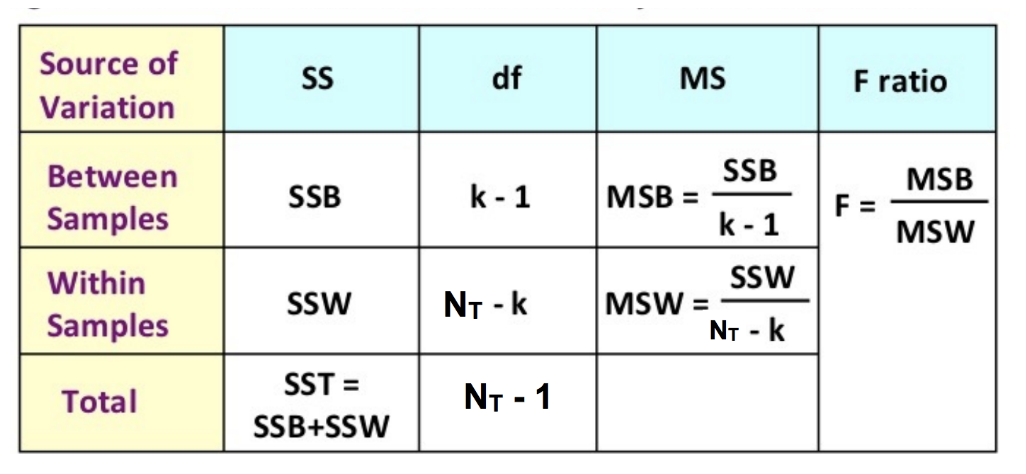

Like regression and t-test, we can also perform hypothesis testing with ANOVA. What would be the null hypothesis in this case? 
- $H0 = \mu_1 = \mu_1 = \mu_3 = \mu_4$
- $H_a$ :H0 is not true

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
data = pd.read_csv('bikeshare_day.csv')
data.head()
# cnt is the outcome we are trying to predict

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


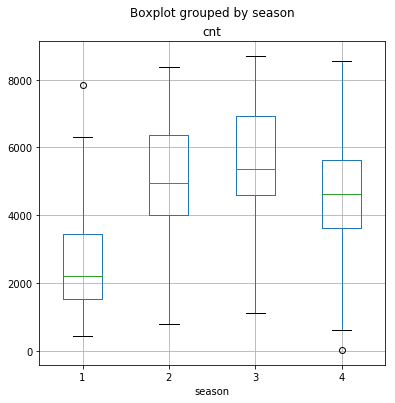

In [3]:
#Create a boxplot
# 1 is spring, 2 is summer, 3 is fall, and 4 is winter
data.boxplot('cnt', by='season', figsize=(6,6))

### Exercises:

#### Question 1: Use the appropriate test, calculate whether the bike rental between spring and summer are significantly different, assuming alpha = 0.01

#### Question 2: Use the appropriate test, calculate whether bike rental is significantly different for each season.

In [2]:
# we can conduct a little bit feature engineering to encode 
#data['season_cat'] = data.season.apply(lambda x: 'winter' if x == 1 else ('spring' if x == 2 else ('summer' if x ==3 else 'fall')))

In [4]:
#data.season_cat

/Users/flee/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


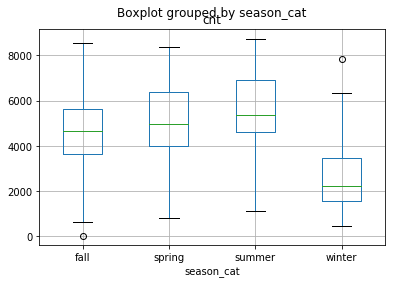

In [5]:
data.boxplot('cnt', by = 'season_cat')

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Next steps
Just because we have rejected the null hypothesis, it doesn't mean we have conclusively showed which group is significantly different from which - remember, the alternative hypothesis is "the null is not true". 

We need to conduct post hoc tests for multiple comparison to find out which groups are different, the most prominent post hoc tests are:
- LSD (Least significant difference)
    - $t\sqrt \frac{MSE}{n}$
- Tukey's HSD 
    - $q\sqrt \frac{MSE}{n}$
    
After calculating a value for LSD or HSD, we compare each pair wise mean difference with the LSD or HSD difference. If the pairwise mean difference exceeds the LSD/HSD, then they are significantly different.